In [2]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import openpyxl
import akshare as ak
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 5000
pd.options.display.float_format = lambda x: '%.5f' % x
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='svg'
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

In [3]:
date2='20241231'#最终日期
date3='20130820'#策略起始日期
date3=datetime.strptime(date3,"%Y%m%d")
date2=datetime.strptime(date2,"%Y%m%d")
CSI300=ak.stock_zh_index_daily(symbol='sh000300')
CSI300['date']=pd.to_datetime(CSI300['date'])
CSI300=CSI300[(CSI300['date']<=date2)&(CSI300['date']>=date3)]
HSI=ak.stock_hk_index_daily_sina(symbol='HSI')
HSI['date']=pd.to_datetime(HSI['date'])
HSI=HSI[(HSI['date']<=date2)&(HSI['date']>=date3)]
SP500=ak.index_us_stock_sina(symbol='.INX')
SP500['date']=pd.to_datetime(SP500['date'])
SP500=SP500[(SP500['date']<=date2)&(SP500['date']>=date3)]
date_A=set(CSI300['date'])
date_B=set(HSI['date'])
date_C=set(SP500['date'])
common_date=date_A&date_B&date_C
df=pd.DataFrame(columns=['date','沪深300','恒生指数','标普500','close_csi300','close_hsi','close_sp500'])
# 直接使用merge方法合并数据
df=pd.DataFrame({'date':sorted(common_date)})
df = df.merge(CSI300[['date', 'close']].rename(columns={'close': 'close_csi300'}),on='date',how='left')
df = df.merge(HSI[['date', 'close']].rename(columns={'close': 'close_hsi'}),on='date',how='left')
df = df.merge(SP500[['date', 'close']].rename(columns={'close': 'close_sp500'}),on='date',how='left')
df=df.dropna().reset_index(drop=True)
df['沪深300']=df['close_csi300']/df.loc[0,'close_csi300']-1
df['恒生指数']=df['close_hsi']/df.loc[0,'close_hsi']-1
df['标普500']=df['close_sp500']/df.loc[0,'close_sp500']-1
df

,date,close_csi300,close_hsi,close_sp500,沪深300,恒生指数,标普500
0,2013-08-20,2312.46500,21964.05100,1652.35000,0.00000,0.00000,0.00000
1,2013-08-21,2308.58900,21817.73000,1642.80000,-0.00168,-0.00666,-0.00578
2,2013-08-22,2303.93200,21895.40000,1656.96000,-0.00369,-0.00313,0.00279
3,2013-08-23,2286.92900,21863.51000,1663.50000,-0.01104,-0.00458,0.00675
4,2013-08-26,2335.61600,22005.32000,1656.78000,0.01001,0.00188,0.00268
5,2013-08-27,2340.88100,21874.77000,1630.48000,0.01229,-0.00406,-0.01324
6,2013-08-28,2328.05600,21532.46100,1634.96000,0.00674,-0.01965,-0.01052
7,2013-08-29,2318.31100,21704.77900,1638.17000,0.00253,-0.01180,-0.00858
8,2013-08-30,2313.91000,21731.36900,1632.97000,0.00062,-0.01059,-0.01173
9,2013-09-03,2354.50200,22402.25000,1639.77000,0.01818,0.01995,-0.00761


Text(0.5, 0, '时间')

Text(0, 0.5, '收益率')

Text(0, 0.5, '收益率')

Text(20250, -0.95, '数据来源：akshare，截至2024年底\n不构成任何投资建议，仅供参考\n制作者：NPC雷神1')

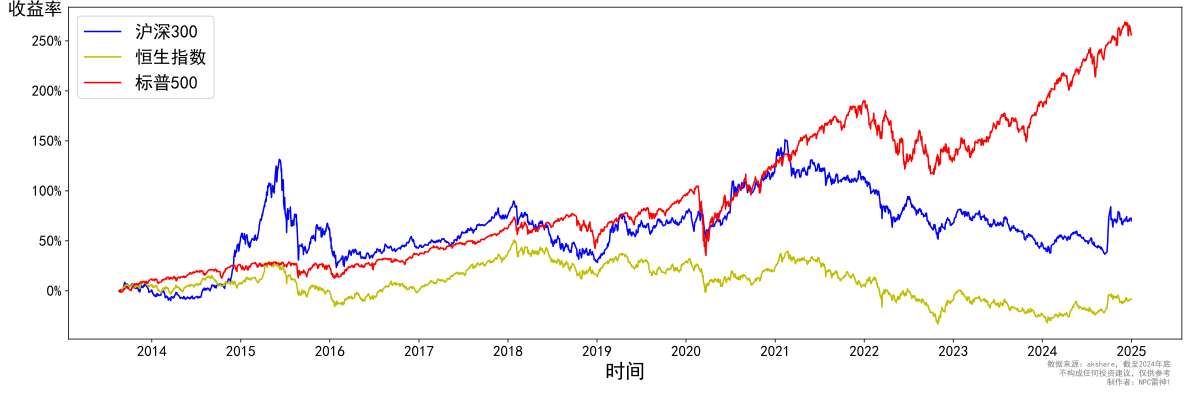

In [4]:
fig,ax=plt.subplots(figsize=(20,6))
plt.plot(df['date'],df['沪深300'],color='b',label='沪深300')
plt.plot(df['date'],df['恒生指数'],color='y',label='恒生指数')
plt.plot(df['date'],df['标普500'],color='r',label='标普500')
plt.xlabel('时间',fontsize=20)
plt.ylabel('收益率',fontsize=18)
ax.set_ylabel('收益率',rotation=0)
ax.yaxis.set_label_coords(-0.03,0.97)
plt.tick_params(labelsize=15)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1,decimals=0))
plt.legend(fontsize=18)
plt.text(x=20250,y=-0.95,s='数据来源：akshare，截至2024年底\n不构成任何投资建议，仅供参考\n制作者：NPC雷神1',ha='right',va='bottom',fontsize=8,color='gray')
plt.savefig(r'E:/jupyter/plot/index_profit(2013-2024)')
plt.show()

#